# **Reading the data**

Reading the raw data, these data have already been transformed into a csv file, because when downloading the data from the [FOSP website](http://www.fosp.saude.sp.gov.br/publicacoes/downloadarquivos) we have a dbf file. Below we have the code for this conversion, it takes some time to make the transformation because the dataset has almost 950 thousand lines.

```
pip install simpledbf
from simpledbf import Dbf5

dbf = Dbf5('your_file.dbf', codec='cp1250')
df = dbf.to_dataframe()
df.to_csv('new_csv_file.csv', encoding='utf-8', index=False)
```

In [ ]:
data = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/pacigeral.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (23,24,25,32,36,78,91) have mixed types.Specify dtype option on import or set low_memory=False.



(943660, 95)


# **Data analysis**

In this section we will analyze some data information with graphs, missing values and each column of the dataset individually.

## **Information**

To start we have the most basic information of the data, such as the size of the dataset, the first lines, type of each column and the describe function that brings some statistical information for each column.

In [ ]:
data.shape

(943660, 95)

In [ ]:
data.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO
0,4,40.0,2,SP,SP,3530805,MOGIMIRIM,9,2000-01-03,15,1,2000-01-10,3,C539,C53,COLO DO UTERO,81402,ADENOCARCINOMA IN SITU SOE,0,0,X,X,0,IS,0,0,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,07/04/2000,8,A,...,0,0,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 14 SĂO JOĂO DA BOA VISTA,15,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,81402.0,ADENOCARCINOMA IN SITU SOE
1,9,45.0,2,RJ,SP,3509502,CAMPINAS,9,2000-01-05,15,1,2000-01-17,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,20/01/2000,8,F,...,0,0,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
2,2,63.0,2,MG,SP,3509502,CAMPINAS,9,2000-01-19,15,1,2000-01-25,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,03/02/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,NaN,NaN,NaN,60-69,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
3,9,64.0,2,SP,SP,3545803,SANTA BARBARA D OESTE,9,2000-01-28,15,1,2000-02-03,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,01/03/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2002-07-15,3,6,33.0,27.0,2000,NaN,NaN,NaN,60-69,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
4,1,48.0,2,SP,SP,3530805,MOGIMIRIM,9,2000-01-04,15,2,2000-01-04,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,15/05/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2016-03-10,2,0,132.0,132.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 14 SĂO JOĂO DA BOA VISTA,15,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943660 entries, 0 to 943659
Data columns (total 95 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ESCOLARI    943660 non-null  int64  
 1   IDADE       943659 non-null  float64
 2   SEXO        943660 non-null  int64  
 3   UFNASC      943660 non-null  object 
 4   UFRESID     943660 non-null  object 
 5   IBGE        943660 non-null  int64  
 6   CIDADE      943660 non-null  object 
 7   CATEATEND   943660 non-null  int64  
 8   DTCONSULT   943660 non-null  object 
 9   CLINICA     943660 non-null  int64  
 10  DIAGPREV    943660 non-null  int64  
 11  DTDIAG      943660 non-null  object 
 12  BASEDIAG    943660 non-null  int64  
 13  TOPO        943660 non-null  object 
 14  TOPOGRUP    943660 non-null  object 
 15  DESCTOPO    943660 non-null  object 
 16  MORFO       943660 non-null  int64  
 17  DESCMORFO   943657 non-null  object 
 18  EC          943660 non-null  object 
 19  EC

In [ ]:
data.describe()

,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,MORFO,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,ERRO,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,IBGEATEN,CIDO
count,943660.00000,943659.000000,943660.000000,9.436600e+05,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.0,943660.0,943660.0,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,868764.000000,868764.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,9.436600e+05,943631.000000
mean,4.37267,59.832544,1.500366,3.545901e+06,4.925719,21.468955,1.371384,2.987796,83645.271036,8.0,7.851896,7.980918,7.997274,7.803760,7.806778,7.796074,0.083336,0.624015,0.260059,0.350319,0.122043,0.003889,0.006654,0.063399,0.999332,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.942144,0.004360,0.029190,0.008128,0.002320,0.000252,0.000152,0.006662,2.436262,52.378192,68.910686,65.945955,2010.314762,6.889584,16.035628,0.173644,0.0,0.917301,0.040326,0.024385,0.022254,3.533473e+06,83645.472312
std,2.94082,16.869766,0.500000,3.686201e+05,3.541344,12.621792,0.483175,0.245657,4587.585415,0.0,0.952922,0.354786,0.134579,1.124976,1.086837,0.895393,0.276390,0.484376,0.438667,0.477070,0.327336,0.062241,0.081300,0.243679,0.025830,0.001029,0.001029,0.0,0.0,0.0,0.0,0.0,0.233470,0.065883,0.168338,0.089788,0.048107,0.015879,0.012309,0.081351,0.860431,166.758604,151.221891,149.361384,5.264743,2.453975,23.992836,0.378803,0.0,0.275427,0.196723,0.154241,0.147508,1.905791e+04,4588.360210
min,1.00000,0.000000,1.000000,1.100015e+06,1.000000,1.000000,1.000000,1.000000,80001.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.502804e+06,80001.000000
25%,2.00000,51.000000,1.000000,3.517505e+06,2.000000,12.000000,1.000000,3.000000,80762.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,11.000000,0.000000,2006.000000,8.000000,6.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.509502e+06,80762.000000
50%,3.00000,62.000000,2.000000,3.540606e+06,2.000000,24.000000,1.000000,3.000000,81403.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,39.000000,32.000000,2011.000000,8.000000,10.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.543402e+06,81403.000000
75%,9.00000,72.000000,2.000000,3.550308e+06,9.000000,29.000000,2.000000,3.000000,85003.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000,81.000000,84.000000,2015.000000

The first graph shows the number of patients per year of diagnosis, a low number of patients is perceived in recent years, probably due to the fact that these cases are still being followed up.

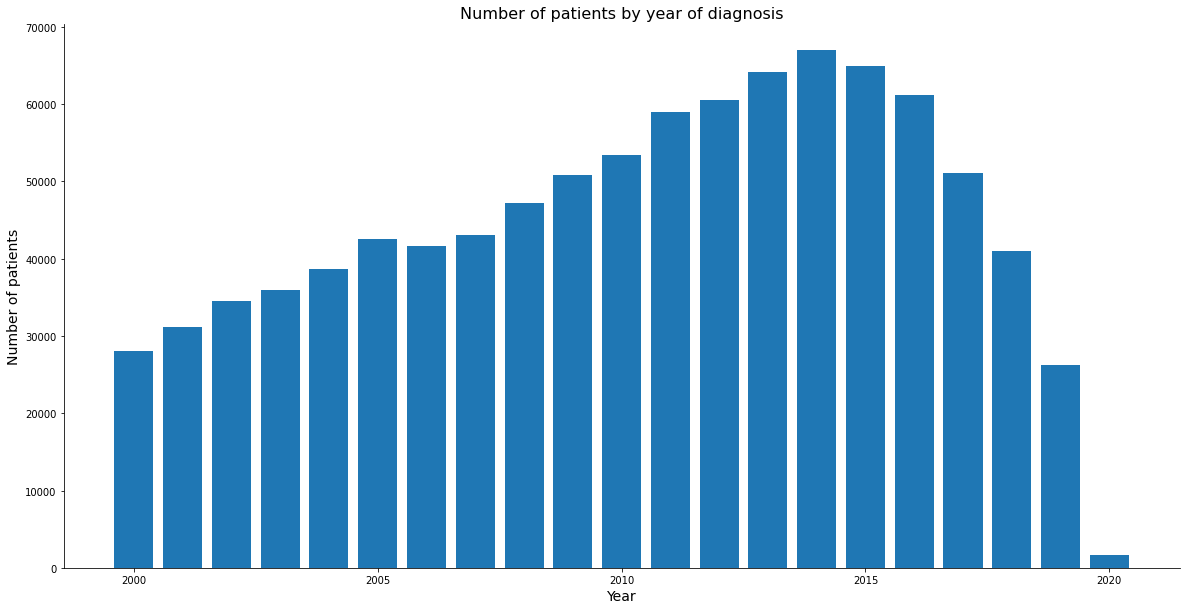

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(height = data.ANODIAG.value_counts().sort_index(), x=np.sort(data.ANODIAG.unique()))
plt.xlabel('Year', size=14)
plt.ylabel('Number of patients', size=14)
plt.title('Number of patients by year of diagnosis', size=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In the following graph we have the number of patients by sex, it's possible to notice that in each year the values are close for men and women.

In [ ]:
masc = data[data.SEXO == 1]
fem = data[data.SEXO == 2]

mascx = np.sort(masc.ANODIAG.unique())
mascy = masc.ANODIAG.value_counts().sort_index()

femx = np.sort(fem.ANODIAG.unique())
femy = fem.ANODIAG.value_counts().sort_index()

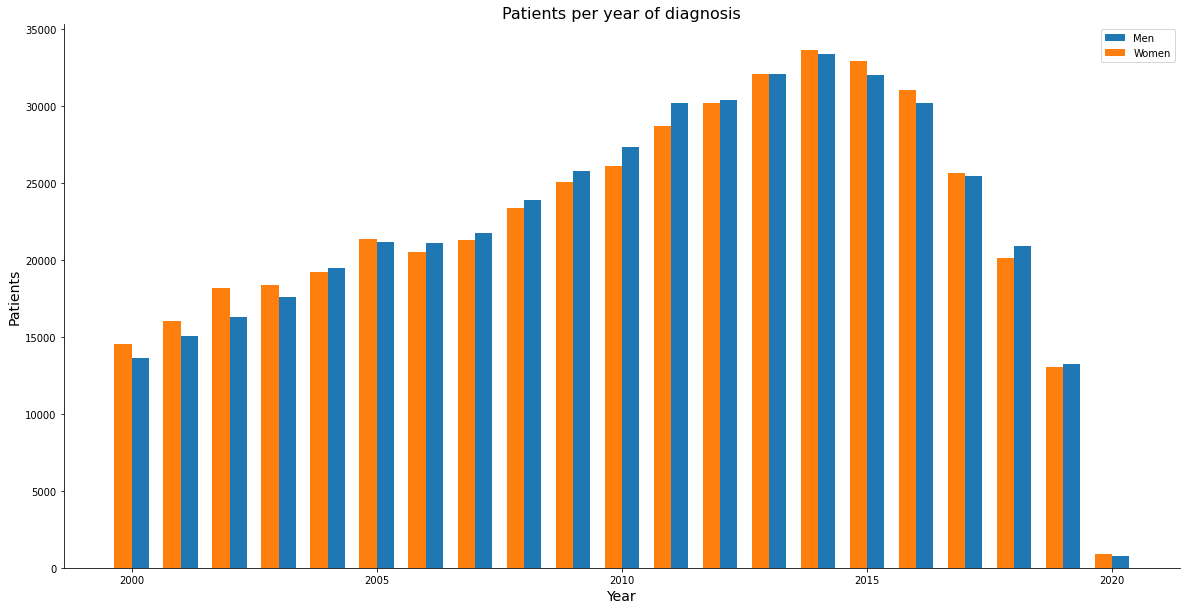

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.35
ax1 = ax.bar(mascx + width/2, mascy, width, label='Men')
ax2 = ax.bar(femx - width/2, femy, width, label='Women')
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Patients', size=14)
ax.set_title('Patients per year of diagnosis', size=16)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Analyzing the percentage of patients by age, we can see that women present the disease earlier, we have 23% of women from 30 to 49 years old against 11% of men in the same age group, but after 60 years old the number of men is higher in relation to women. It is also noticed that there is a higher incidence of cancer after 40 years old, with more than 85% of cases in both genders being in this age group.

In [ ]:
# Using replace to change the string format for the age group column
masc.FAIXAETAR = masc.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                        ['00 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69'])
fem.FAIXAETAR = fem.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                      ['00 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69'])

In [ ]:
mascx = np.sort(masc.FAIXAETAR.unique())
mascy = masc.FAIXAETAR.value_counts().sort_index()

femx = np.sort(fem.FAIXAETAR.unique())
femy = fem.FAIXAETAR.value_counts().sort_index()

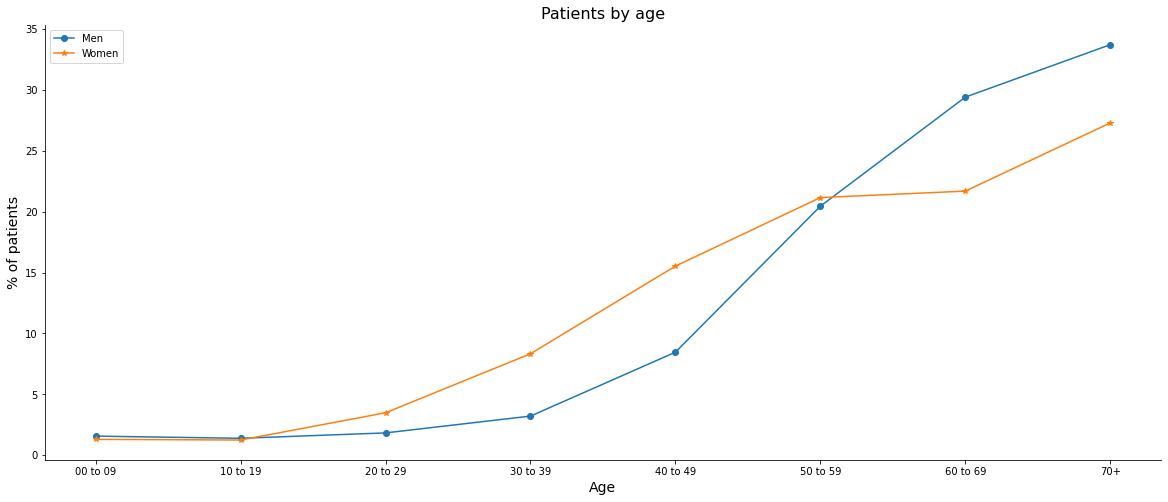

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(mascx, (mascy/masc.shape[0])*100, label='Men', marker='o')
ax2 = ax.plot(femx, (femy/fem.shape[0])*100, label='Women', marker='*')
ax.set_xlabel('Age', size=14)
ax.set_ylabel('% of patients', size=14)
ax.set_title('Patients by age', size=16)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Looking at the clinical stage by sex, lower values for staging represent less aggressive diseases, we see women with more cases for stages 0 and 1 and men with higher numbers in stage 2 and much higher in stage 4.

The clinical stage assists the doctors in the therapeutic planning and in the evaluation of the proposed treatment, in addition to serving for the prediction of the prognosis.

In the analysis of the data according to staging, cases reported as X (cases which it is not possible to perform staging or without information) and Y (type of cancer which the classification of malignant TNM tumors are not applied) were excluded.

In [ ]:
EC = list(np.sort(data.ECGRUP.unique()))[:5] # Categories 0, I, II, III, IV, without X and Y

mascEC = masc.loc[masc.ECGRUP.isin(EC)]
femEC = fem.loc[fem.ECGRUP.isin(EC)]

mascx = np.sort(mascEC.ECGRUP.unique())
mascy = mascEC.ECGRUP.value_counts().sort_index()

femx = np.sort(femEC.ECGRUP.unique())
femy = femEC.ECGRUP.value_counts().sort_index()

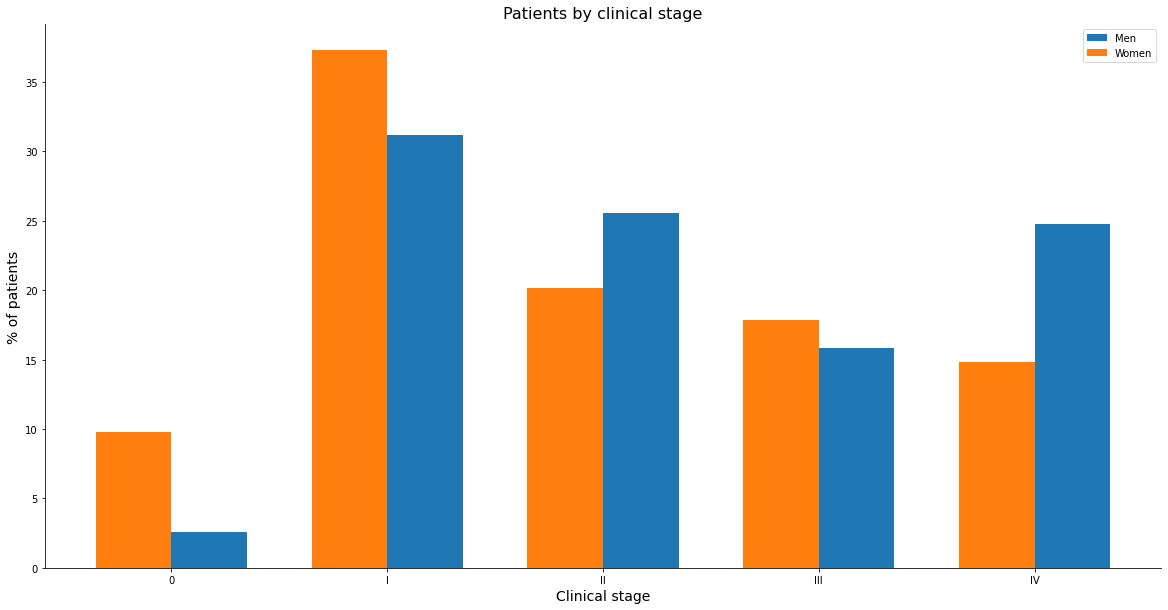

In [ ]:
x = np.arange(len(mascx))
fig, ax = plt.subplots(figsize=(20,10))
width = 0.35
ax1 = ax.bar(x + width/2, (mascy/mascEC.shape[0])*100, width, label='Men')
ax2 = ax.bar(x - width/2, (femy/femEC.shape[0])*100, width, label='Women')
ax.set_xlabel('Clinical stage', size=14)
ax.set_ylabel('% of patients', size=14)
ax.set_title('Patients by clinical stage', size=16)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(mascx))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

To analyze the time between consultation and diagnosis, the median number of days for each year was used, looking only at patients without diagnosis and without treatment in this first graph. For 2020 we have less data, so the median was much higher compared to other years.

In [ ]:
df_diag1 = data[data.DIAGPREV == 1] # without diagnosis/without treatment
df_diag2 = data[data.DIAGPREV == 2] # with diagnosis/without treatment

In [ ]:
x = np.sort(df_diag1.ANODIAG.unique())
y = df_diag1.groupby('ANODIAG')['CONSDIAG'].median()

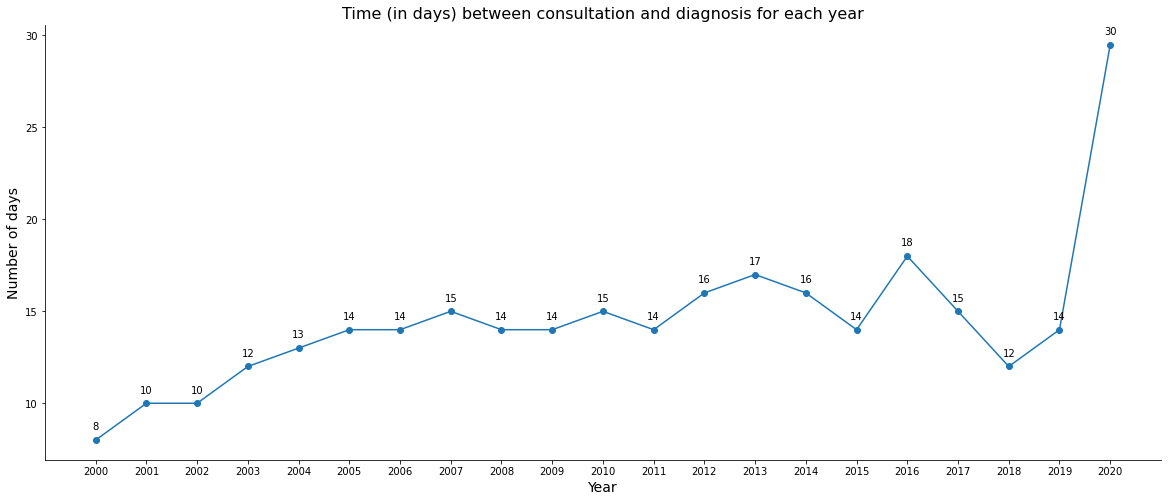

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x, y, marker='o')
plt.xlabel('Year', size=14)
plt.xticks(x)
plt.ylabel('Number of days', size=14)
plt.title('Time (in days) between consultation and diagnosis for each year', size=16)
for xi, yi in zip(x,y):
    label = "{:.0f}".format(yi)
    plt.annotate(label, # this is the text
                 (xi, yi), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Now comparing patients without previous diagnosis with those who had the diagnosis, we can a much higher number of days to start treatment for people who already had the diagnosis of the disease, probably because they may have sought after other medical opinions, having gone to more than one hospital, delaying the start of cancer treatment.

In this analysis, C44 topographies (with morphologies between 80101 and 81103), who did not undergo any treatment (NAOTRAT = 8) and morphology 80001 (neoplasms with uncertain behavior) were excluded.

In [ ]:
df1 = df_diag1[(df_diag1.TOPOGRUP == 'C44') & (df_diag1.MORFO > 80101) & (df_diag1.MORFO < 81103)]
df2 = df_diag2[(df_diag2.TOPOGRUP == 'C44') & (df_diag2.MORFO > 80101) & (df_diag2.MORFO < 81103)]

id1 = df1.index
df_diag1 = df_diag1.drop(id1)

id2 = df2.index
df_diag2 = df_diag2.drop(id2)

df_diag1 = df_diag1[(df_diag1.NAOTRAT == 8) & (df_diag1.MORFO != 80001)] 
df_diag2 = df_diag2[(df_diag2.NAOTRAT == 8) & (df_diag2.MORFO != 80001)]

x1 = np.sort(df_diag1.ANODIAG.unique())
y1 = df_diag1.groupby('ANODIAG')['DIAGTRAT'].median()

x2 = np.sort(df_diag2.ANODIAG.unique())
y2 = df_diag2.groupby('ANODIAG')['DIAGTRAT'].median()

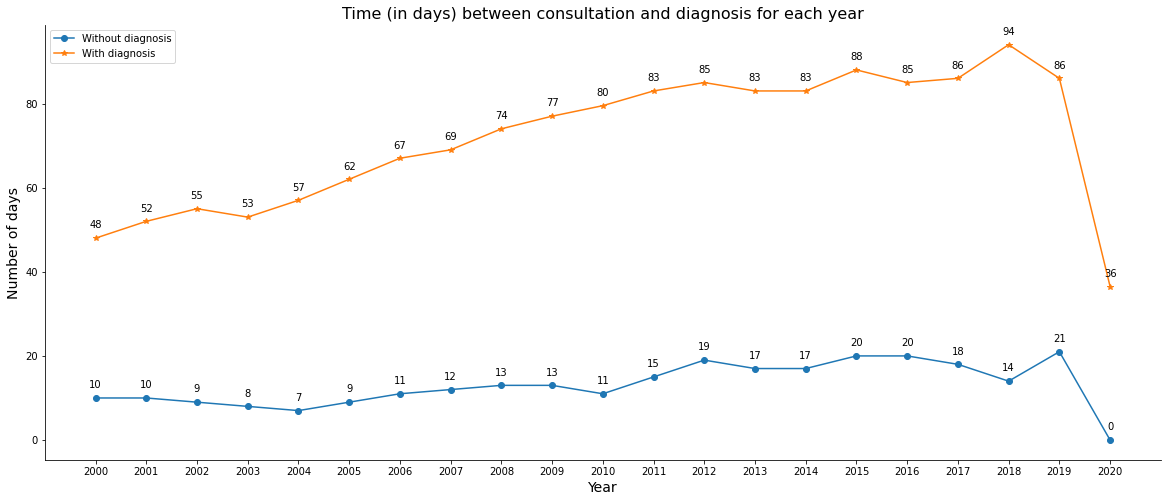

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(x1, y1, label='Without diagnosis', marker='o')
ax2 = ax.plot(x2, y2, label='With diagnosis', marker='*')
ax.set_xlabel('Year', size=14)
ax.set_xticks(x1)
ax.set_ylabel('Number of days', size=14)
ax.set_title('Time (in days) between consultation and diagnosis for each year', size=16)
ax.legend()
for xi1, yi1, xi2, yi2 in zip(x1, y1, x2, y2):
    label1 = '{:.0f}'.format(yi1)
    label2 = '{:.0f}'.format(yi2)
    ax.annotate(label1, # this is the text
                (xi1, yi1), # this is the point to label
                textcoords='offset points', # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
    ax.annotate(label2, # this is the text
                (xi2, yi2), # this is the point to label
                textcoords='offset points', # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Now looking at the data from the latest patient information, we have a higher number of women in the category alive and of men in the two categories related to patient death, by cancer and other causes.

In [ ]:
# 1 – Alive with cancer; 2 – Alive, without other specifications;
# 3 – Death by cancer; 4 – Death by other causes, without other specifications
data['ULTINFO'].value_counts()

2    435227
3    275159
4    123266
1    110008
Name: ULTINFO, dtype: int64

In [ ]:
mascx = np.sort(masc.ULTINFO.unique())
mascy = masc.ULTINFO.value_counts().sort_index()

femx = np.sort(fem.ULTINFO.unique())
femy = fem.ULTINFO.value_counts().sort_index()

x_ticks = ["Alive with cancer", "Alive, without other specifications", "Death by cancer", "Death by other causes"]

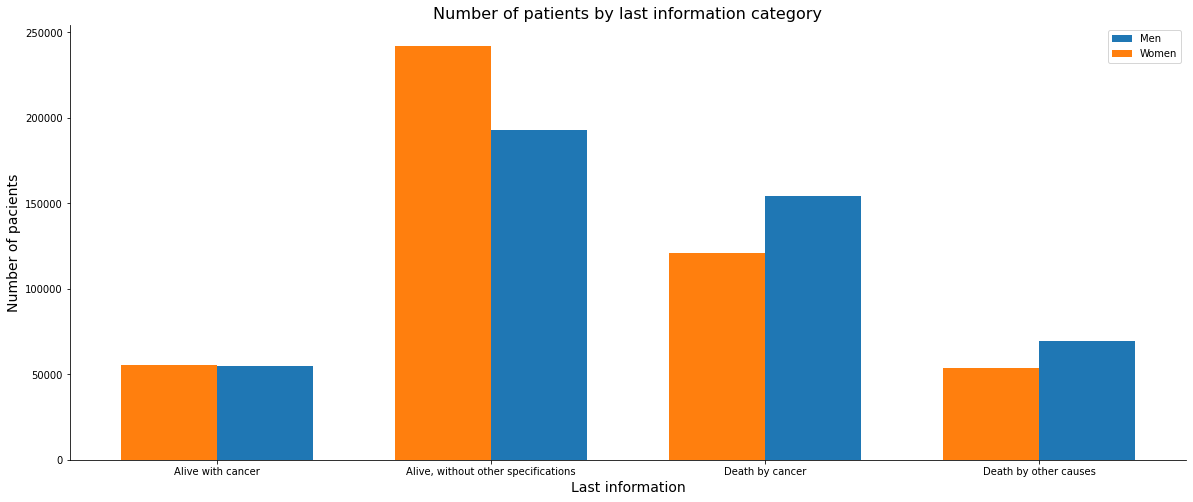

In [ ]:
x = np.arange(len(x_ticks))
fig, ax = plt.subplots(figsize=(20, 8))
width = 0.35
ax1 = ax.bar(x + width/2, mascy, width, label='Men')
ax2 = ax.bar(x - width/2, femy, width, label='Women')
ax.set_xlabel('Last information', size=14)
ax.set_ylabel('Number of pacients', size=14)
ax.set_title('Number of patients by last information category', size=16)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(x_ticks))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Now we will analyze the correlation of the `ULTINFO` column with the others in this dataset, we notice a good correlation with `PERDASEG`, which indicates whether the patient is being monitored by the hospital, and with the `ANODIAG` column, which has the year of the patient's diagnosis, otherwise we don't have such high correlations. 


In [ ]:
corr_matrix = data.corr()
corr_matrix['ULTINFO'].sort_values(ascending = False)

ULTINFO       1.000000
CATEATEND     0.209677
IDADE         0.179051
GLEASON       0.123226
PSA           0.118750
NENHUM        0.108192
LATERALI      0.077999
RECREGIO      0.068783
QUIMIO        0.054078
NENHUMAPOS    0.052510
RADIO         0.037872
RECLOCAL      0.034662
RECDIST       0.019467
G             0.019415
IDMITOTIC     0.011788
NENHUMANT     0.008194
CIRURANT     -0.000522
RADIOANT     -0.000522
TMO          -0.003801
IMUNO        -0.004610
OUTROS       -0.004980
TMOAPOS      -0.006424
IMUNOAPOS    -0.007243
BASEDIAG     -0.016254
IBGE         -0.016555
LOCALTNM     -0.018795
TRATCONS     -0.021244
CIRURAPOS    -0.024802
HORMOAPOS    -0.029185
IBGEATEN     -0.037029
OUTROAPOS    -0.042629
RRAS         -0.043626
RADIOAPOS    -0.044204
CONSDIAG     -0.045605
DIAGPREV     -0.049736
QUIMIOAPOS   -0.049821
DIAGTRAT     -0.055853
HORMONIO     -0.060877
CIDO         -0.062996
MORFO        -0.063005
CLINICA      -0.063309
RECNENHUM    -0.068966
ESCOLARI     -0.069296
SEXO       

In the correlation matrix we can see the correlations between all columns and as described above for the case of the analysis only for `ULTINFO`, we do not have very high correlations. 

It is important to note that the data has not been processed yet, so after preprocessing a more explanatory matrix for the data should be obtained.

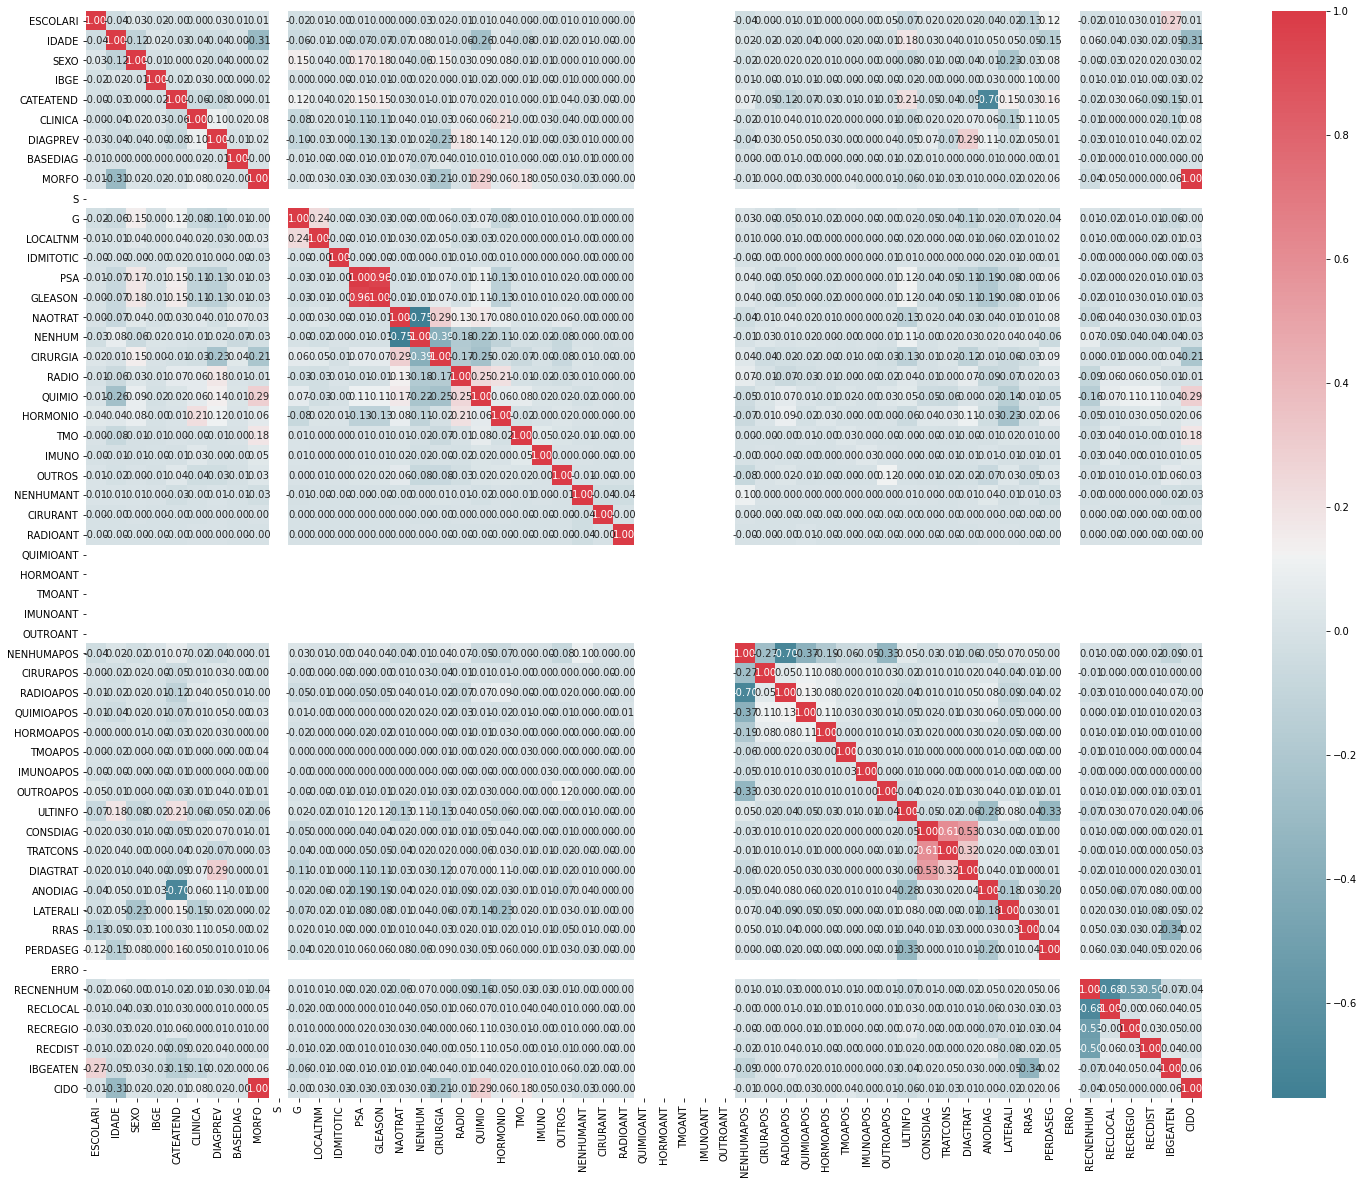

In [ ]:
fig, ax = plt.subplots(figsize = (25,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = '.2f')
fig.show()

With the histograms you can see how the distributions of the dataset columns are, but since we have most of them with categorical data, the histograms bring information about the amount of data in the respective categories.

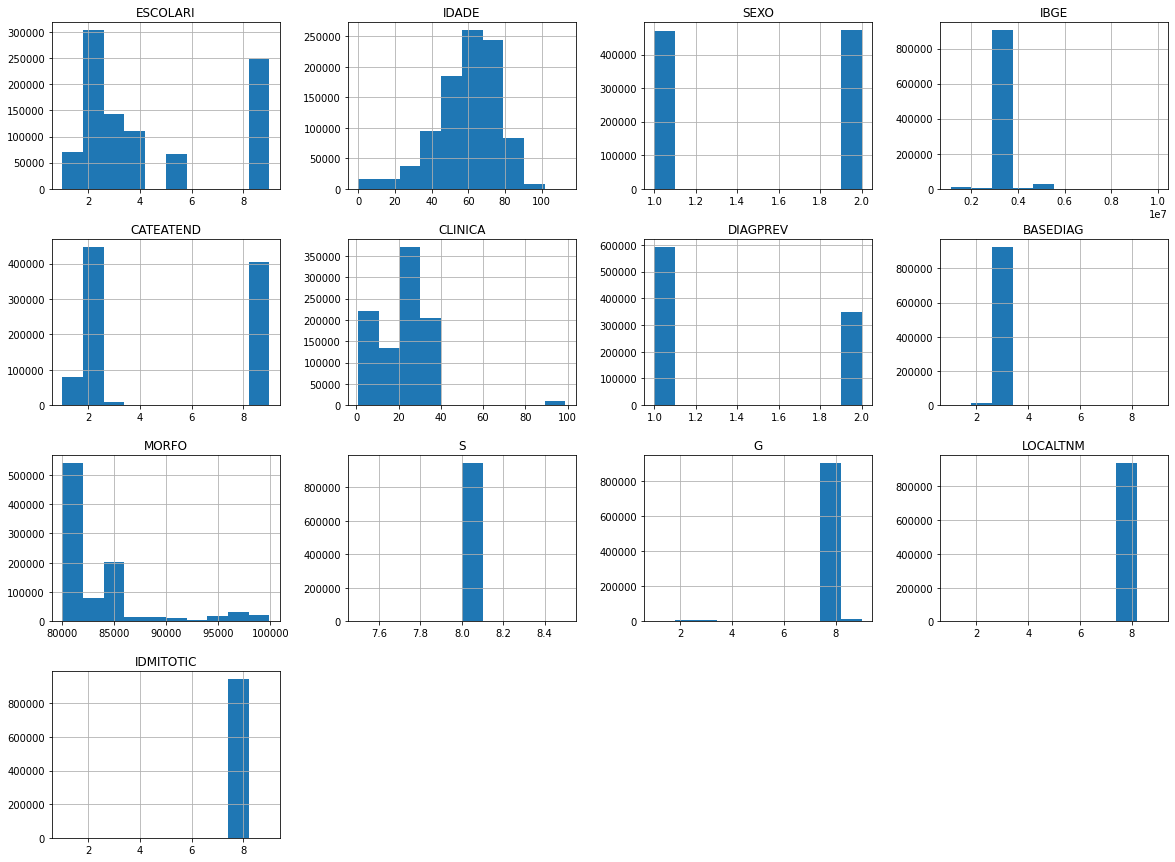

In [ ]:
data.iloc[:,:30].hist(bins=10,figsize=(20,15))
plt.show()

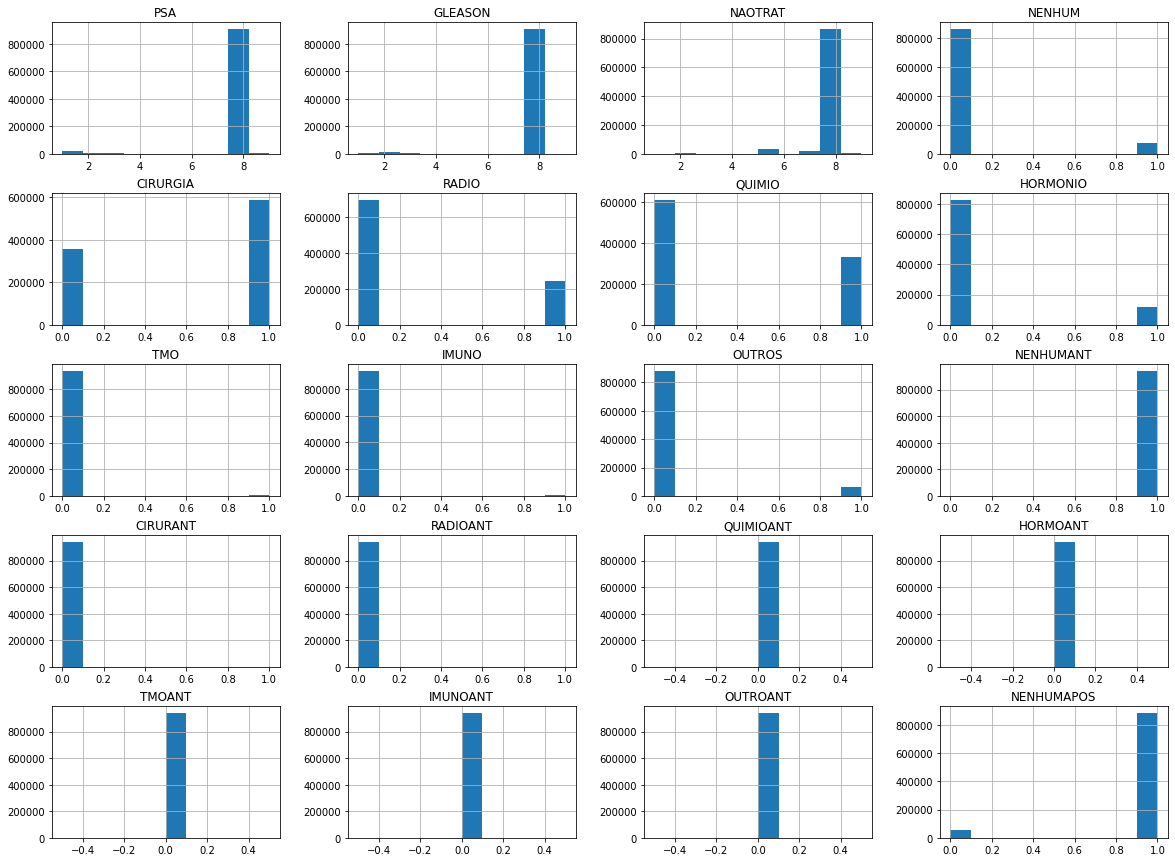

In [ ]:
data.iloc[:,30:60].hist(bins=10,figsize=(20,15))
plt.show()

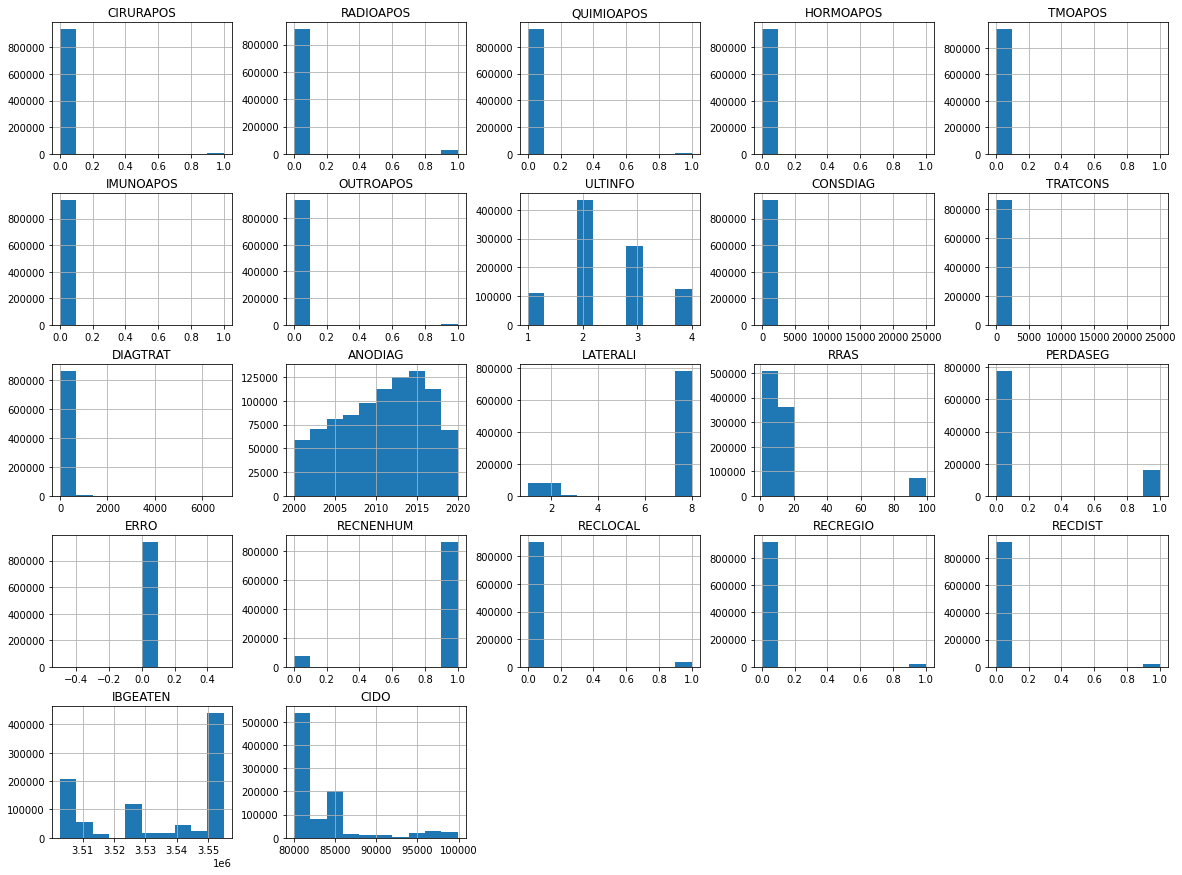

In [ ]:
data.iloc[:,60:].hist(bins=10,figsize=(20,15))
plt.show()

## **Missing values**

Now let's see the amount of missing values per column, we have 17 columns with more than 50% of missing data, if we want to use any of these for the machine learning models, it will be necessary to treat the missing values, placing 0 or some string that indicates that the value is missing, for example. Another option is not using the columns in the analysis, we will see later in this project the proposed solutions to solve this problem.

In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
prop = missing[missing > 0]/data.shape[0]
prop

INSTORIG      0.999511
REC04         0.998494
META04        0.996361
REC03         0.994401
META03        0.987246
REC02         0.982164
CICI          0.972926
CICIGRUP      0.972926
CICISUBGRU    0.972926
META02        0.960153
REC01         0.937256
OUTRACLA      0.935571
DTRECIDIVA    0.899434
META01        0.868684
PM            0.579580
PN            0.556207
PT            0.551369
TRATCONS      0.079368
DIAGTRAT      0.079368
DTTRAT        0.079368
DRS           0.075212
DTULTINFO     0.000048
CIDO          0.000031
DSCCIDO       0.000031
DESCMORFO     0.000003
IDADE         0.000001
dtype: float64

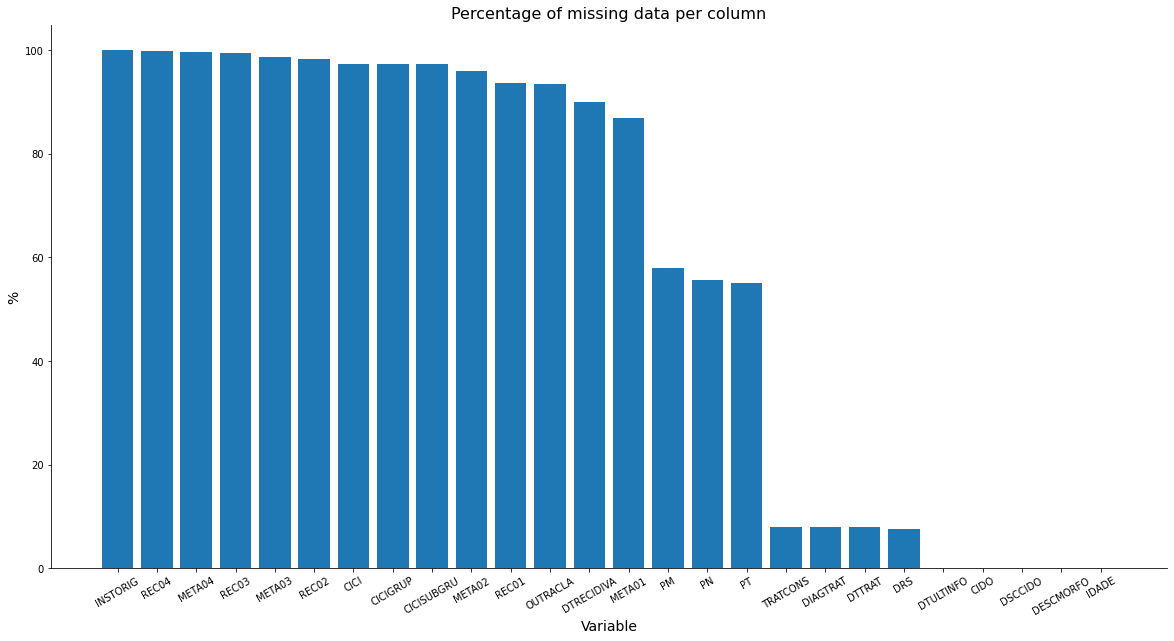

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(height = prop*100, x=prop.index)
plt.xlabel('Variable', size=14)
plt.ylabel('%', size=14)
plt.title('Percentage of missing data per column', size=16)
plt.xticks(rotation=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## **Columns analysis**

In this section, the columns will be analyzed individually, with the aim of examining each one of them and obtaining a function that will be used in the data before starting the study with the machine learning models.

The columns were divided according to the type of each one, resulting in the categories: dates, numeric categories, letters categories, numbers, strings, letters and numbers categories.

Columns with unique values will be dropped from the dataset in the function called `variables_preprocessing`. Another treatment that will be done in the columns is the filling of string columns with missing values with ** Sem informação **, being the columns:

* `META01`;

* `META02`;

* `META03`;

* `META04`;

* `REC01`;

* `REC02`;

* `REC03`;

* `REC04`;

* `PT`;

* `PN`;

* `PM`;

* `CICI`;

* `CICIGRUP`.

The `DRS` column will have the missing values filled with 0, after using the split method to obtain only the numbers in this column, just as done for the `CICIGRUP` column.

Finally, the columns that were dropped from the dataset, because they have unique values or because they are descriptions of the disease, are the following:

* `S`;

* `QUIMIOANT`;

* `HORMOANT`;

* `TMOANT`;

* `IMUNOANT`;

* `OUTROANT`;

* `ERRO`;

* `CIDO`;

* `UFNASC`;

* `CIDADE`;

* `DESCTOPO`;

* `DESCMORFO`;

* `DSCCIDO`;

* `CICISUBGRU`;

* `INSTORIG`;

* `OUTRACLA`.

> Check the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

In [ ]:
df_aux = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/pacigeral.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (23,24,25,32,36,78,91) have mixed types.Specify dtype option on import or set low_memory=False.



(943660, 95)


### **Dates**

In [ ]:
# Data - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA']
df_aux[dates].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT         74896
DTULTINFO         45
DTRECIDIVA    848760
dtype: int64

In [ ]:
(df_aux[dates].isna().sum()/df_aux.shape[0])*100

DTCONSULT      0.000000
DTDIAG         0.000000
DTTRAT         7.936757
DTULTINFO      0.004769
DTRECIDIVA    89.943412
dtype: float64

### **Numerical categories**

In [ ]:
df_aux.ESCOLARI.value_counts()

2    303175
9    249236
3    142196
4    110885
1     71032
5     67136
Name: ESCOLARI, dtype: int64

In [ ]:
df_aux.SEXO.value_counts()

2    472175
1    471485
Name: SEXO, dtype: int64

In [ ]:
df_aux.CATEATEND.value_counts()

2    448124
9    404512
1     80862
3     10162
Name: CATEATEND, dtype: int64

In [ ]:
np.sort(df_aux.CLINICA.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 99])

In [ ]:
df_aux.DIAGPREV.value_counts()

1    593200
2    350460
Name: DIAGPREV, dtype: int64

In [ ]:
df_aux.BASEDIAG.value_counts()

3    927294
2     13320
1      2059
9       987
Name: BASEDIAG, dtype: int64

In [ ]:
df_aux.S.value_counts() ### drop

8    943660
Name: S, dtype: int64

In [ ]:
df_aux.G.value_counts()

8    903222
9     12770
3     10600
2      8549
1      4720
4      3799
Name: G, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.G[df_aux.G < 8].count()

27668

In [ ]:
df_aux.LOCALTNM.value_counts()

8    939049
2      2006
9      1384
1       625
3       596
Name: LOCALTNM, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.LOCALTNM[df_aux.LOCALTNM < 8].count()

3227

In [ ]:
df_aux.IDMITOTIC.value_counts()

8    943155
2       267
1       151
9        87
Name: IDMITOTIC, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.IDMITOTIC[df_aux.IDMITOTIC < 8].count()

418

In [ ]:
df_aux.PSA.value_counts()

8    911114
1     17698
2      6282
3      5362
9      3204
Name: PSA, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.PSA[df_aux.PSA < 8].count()

29342

In [ ]:
df_aux.GLEASON.value_counts()

8    911114
2     13794
1     10079
3      6282
9      2391
Name: GLEASON, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.GLEASON[df_aux.GLEASON < 8].count()

30155

In [ ]:
df_aux.NAOTRAT.value_counts()

8    868397
5     30655
7     20453
2      9166
9      7324
6      2474
3      1892
4      1718
1      1581
Name: NAOTRAT, dtype: int64

In [ ]:
df_aux.NENHUM.unique()

array([0, 1])

In [ ]:
df_aux.CIRURGIA.unique()

array([1, 0])

In [ ]:
df_aux.RADIO.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIO.unique()

array([0, 1])

In [ ]:
df_aux.HORMONIO.unique()

array([0, 1])

In [ ]:
df_aux.TMO.unique()

array([0, 1])

In [ ]:
df_aux.IMUNO.unique()

array([0, 1])

In [ ]:
df_aux.OUTROS.unique()

array([0, 1])

In [ ]:
df_aux.NENHUMANT.unique()

array([1, 0])

In [ ]:
df_aux.CIRURANT.unique()

array([0, 1])

In [ ]:
df_aux.RADIOANT.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOANT.unique() ### drop

array([0])

In [ ]:
df_aux.HORMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.TMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.IMUNOANT.unique() ### drop

array([0])

In [ ]:
df_aux.OUTROANT.unique() ### drop

array([0])

In [ ]:
df_aux.NENHUMAPOS.unique()

array([1, 0])

In [ ]:
df_aux.CIRURAPOS.unique()

array([0, 1])

In [ ]:
df_aux.RADIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.HORMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.TMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.IMUNOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.OUTROAPOS.unique()

array([0, 1])

In [ ]:
df_aux.ULTINFO.value_counts()

2    435227
3    275159
4    123266
1    110008
Name: ULTINFO, dtype: int64

In [ ]:
df_aux.LATERALI.value_counts()

8    782219
1     81545
2     77560
3      2336
Name: LATERALI, dtype: int64

In [ ]:
df_aux.PERDASEG.value_counts()

0    779799
1    163861
Name: PERDASEG, dtype: int64

In [ ]:
df_aux[df_aux.PERDASEG == 1]['ULTINFO'].value_counts()

2    135234
1     28626
3         1
Name: ULTINFO, dtype: int64

In [ ]:
df_aux.ERRO.unique() ### drop

array([0])

In [ ]:
df_aux.RECNENHUM.value_counts()

1    865620
0     78040
Name: RECNENHUM, dtype: int64

In [ ]:
df_aux.RECLOCAL.value_counts()

0    905606
1     38054
Name: RECLOCAL, dtype: int64

In [ ]:
df_aux.RECREGIO.value_counts()

0    920649
1     23011
Name: RECREGIO, dtype: int64

In [ ]:
df_aux.RECDIST.value_counts()

0    922660
1     21000
Name: RECDIST, dtype: int64

### **Letter categories**

In [ ]:
df_aux.TRATAMENTO.unique()

array(['A', 'F', 'B', 'D', 'G', 'I', 'J', 'C', 'E', 'H'], dtype=object)

In [ ]:
df_aux.TRATHOSP.unique()

array(['A', 'F', 'B', 'D', 'G', 'I', 'J', 'C', 'E', 'H'], dtype=object)

In [ ]:
df_aux.TRATFANTES.unique()

array(['J', 'A', 'B'], dtype=object)

In [ ]:
df_aux.TRATFAPOS.unique()

array(['J', 'B', 'C', 'I', 'F', 'A', 'D', 'E', 'G', 'H'], dtype=object)

### **Numbers**

In [ ]:
df_aux.IDADE.nunique()

109

In [ ]:
df_aux[df_aux.IDADE.isnull() == True]

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO
125874,9,NaN,1,BA,SP,3549904,SAO JOSE DOS CAMPOS,9,2011-11-16,24,2,2011-03-11,3,C619,C61,PROSTATA,85503,CARCINOMA DE CELULAS ACINOSAS,IV,IV,4,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,18/11/2011,8,I,...,0,0,0,0,1,0,0,0,0,0,0,0,2015-08-28,3,250,2.0,252.0,2011,XIF,XI OUTROS NEOPLASMAS MALIGNOS EPITELIAIS E OU...,F OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIFI...,70+,8,NaN,DRS 17 TAUBATÉ,17,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3549904,85503.0,CARCINOMA DE CELULAS ACINOSAS


In [ ]:
df_aux.CONSDIAG.isna().sum()

0

In [ ]:
df_aux.TRATCONS.isna().sum()

74896

In [ ]:
df_aux.TRATCONS.median()

39.0

In [ ]:
df_aux.DIAGTRAT.isna().sum()

74896

In [ ]:
df_aux.DIAGTRAT.median()

32.0

In [ ]:
np.sort(df_aux.ANODIAG.unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df_aux.IBGE.nunique()

2955

In [ ]:
df_aux.IBGE.isna().sum()

0

In [ ]:
df_aux.IBGEATEN.isna().sum()

0

In [ ]:
df_aux.IBGEATEN.unique()

array([3509502, 3543402, 3554102, 3550308, 3506003, 3510609, 3530706,
       3547809, 3549904, 3552205, 3548708, 3548500, 3504503, 3507506,
       3507605, 3525904, 3503307, 3526902, 3538709, 3503208, 3505500,
       3516200, 3548906, 3525300, 3511102, 3549805, 3541406, 3529005,
       3524402, 3502804, 3522406, 3536208, 3552809, 3555000, 3530607,
       3518404, 3548807, 3543907, 3504008, 3513801, 3549102, 3518701,
       3534708, 3524808])

In [ ]:
df_aux.CIDO.isna().sum()

29

In [ ]:
df_aux.CIDO.unique()

array([81402., 80703., 81403., 84803., 80102., 85003., 85303., 85202.,
       89303., 86201., 85203., 85002., 83803., 83103., 85603., 80763.,
       80103., 89803., 89503., 80723., 84403., 80503., 85103., 85703.,
       80772., 80203., 82113., 80702., 82603., 85901., 88003., 90703.,
       88903., 85033., 89333., 91001., 85043., 84413., 84603., 87203.,
       84621., 86231., 82013., 85223., 88013., 84421., 90203., 90603.,
       85012., 90803., 82303., 82513., 91013., 85423., 80713., 86501.,
       80903., 80413., 95913., 80513., 82003., 80333., 90201., 80013.,
       80003., 80001., 84721., 86203., 88323., 90003., 84703., 82012.,
       87303., 86211., 90801., 95813., 80502., 86301., 82463., 80753.,
       91203., 90713., 80762., 85403., 82623., 89103., 82302., 80743.,
       80223., 80983., 81203., 83843., 90643., 82403., 85233., 85013.,
       90813., 85042., 91003., 89313., 80053., 84823., 88913., 84013.,
       85753., 86401., 85133., 84713., 86313., 85032., 80523., 90853.,
      

In [ ]:
df_aux.MORFO.unique()

array([81402, 80703, 81403, 84803, 80102, 85003, 85303, 85202, 89303,
       86201, 85203, 85002, 83803, 83103, 85603, 80763, 80103, 89803,
       89503, 80723, 84403, 80503, 85103, 85703, 80772, 80203, 82113,
       80702, 82603, 85901, 88003, 90703, 88903, 85033, 89333, 91001,
       85043, 84413, 84603, 87203, 84623, 86231, 82013, 85223, 88013,
       84423, 90203, 90603, 85012, 90803, 82303, 82513, 91013, 85423,
       80713, 86501, 80903, 80413, 95913, 80513, 82003, 80333, 90201,
       80013, 80003, 80001, 84723, 86203, 88323, 90003, 84703, 82012,
       87303, 86211, 90801, 95813, 80502, 86301, 82463, 80753, 91203,
       90713, 80762, 85403, 82623, 89103, 82302, 80743, 80223, 80983,
       81203, 84421, 83843, 90643, 82403, 85233, 85013, 90813, 85042,
       91003, 89313, 80053, 84823, 88913, 84013, 85753, 86401, 85133,
       84713, 86313, 85032, 80523, 90853, 89361, 85213, 83203, 86403,
       86703, 85222, 88053, 89353, 80133, 83233, 90503, 84073, 89013,
       81482, 84721,

In [ ]:
(df_aux.CIDO == df_aux.MORFO).value_counts()

True     940168
False      3492
dtype: int64

In [ ]:
df_aux[(df_aux.CIDO == df_aux.MORFO) == False][['MORFO','CIDO']].head(10)

,MORFO,CIDO
628,84623,84621.0
740,84423,84421.0
812,84423,84421.0
1652,84423,84421.0
1739,84423,84421.0
1793,84423,84421.0
1843,84623,84621.0
2007,84423,84421.0
2016,84423,84421.0
2021,84423,84421.0


In [ ]:
np.sort(df_aux.RRAS.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       99])

In [ ]:
df_aux.RRAS.value_counts()

6     243705
12    105621
13    103141
9      79553
99     70975
15     59522
10     38266
1      31728
14     31086
17     30800
8      28936
2      27409
5      21975
7      19548
16     18373
4      14259
11     14104
3       4659
Name: RRAS, dtype: int64

### **Strings**

In [ ]:
df_aux.UFNASC.unique()

array(['SP', 'RJ', 'MG', 'MA', 'AL', 'SE', 'CE', 'PE', 'PR', 'PB', 'BA',
       'PI', 'SI', 'OP', 'RS', 'MS', 'ES', 'GO', 'SC', 'AM', 'MT', 'RN',
       'TO', 'AP', 'DF', 'PA', 'RR', 'AC', 'RO'], dtype=object)

In [ ]:
df_aux.UFRESID.unique()

array(['SP', 'MG', 'TO', 'MS', 'CE', 'BA', 'RO', 'PB', 'AL', 'ES', 'SC',
       'PR', 'MA', 'RJ', 'PI', 'RS', 'GO', 'MT', 'PE', 'SE', 'DF', 'PA',
       'AM', 'RN', 'RR', 'AC', 'OP', 'AP'], dtype=object)

In [ ]:
df_aux.CIDADE.value_counts().head(10)

SAO PAULO                243705
SAO JOSE DO RIO PRETO     17339
CAMPINAS                  16972
RIBEIRAO PRETO            16260
GUARULHOS                 13592
JAU                       11695
BOTUCATU                  10102
OSASCO                     9686
PIRACICABA                 9518
BARRETOS                   9334
Name: CIDADE, dtype: int64

In [ ]:
df_aux.FAIXAETAR.unique()

array(['40-49', '60-69', '30-39', '70+', '50-59', '20-29', '10-19',
       '00-09'], dtype=object)

In [ ]:
df_aux.DRS.unique()

array(['DRS 14  SĂO JOĂO DA BOA VISTA', 'DRS 07  CAMPINAS',
       'DRS 13  RIBEIRĂO PRETO', nan, 'DRS 10  PIRACICABA',
       'DRS 01  SĂO PAULO', 'DRS 17  TAUBATÉ', 'DRS 16  SOROCABA',
       'DRS 03  ARARAQUARA', 'DRS 04  SANTOS', 'DRS 06  BAURU',
       'DRS 15  SĂO JOSÉ DO RIO PRETO', 'DRS 12  REGISTRO',
       'DRS 09  MARÍLIA', 'DRS 02  ARAÇATUBA',
       'DRS 11  PRESIDENTE PRUDENTE', 'DRS 08  FRANCA',
       'DRS 05  BARRETOS'], dtype=object)

In [ ]:
df_aux.DRS.isna().sum()

70975

In [ ]:
df_aux.DESCTOPO.value_counts().head(10)

PELE DE OUTRAS PARTES E DE PARTES NAO ESPECIFICADAS DA FACE    100718
PROSTATA                                                       100166
MAMA SOE EXCLUI PELE DA MAMA C445                               51634
COLO DO UTERO                                                   43448
MEDULA OSSEA                                                    33553
MAMA QUADRANTE SUPERIOR EXTERNO DA                              30512
PELE DO OMBRO E MEMBROS SUPERIORES                              27308
RETO SOE                                                        26979
PELE DO TRONCO                                                  22454
PULMAO SOE                                                      21971
Name: DESCTOPO, dtype: int64

In [ ]:
df_aux.DESCMORFO.value_counts().head(10)

CARCINOMA ESCAMOCELULAR SOE            148805
ADENOCARCINOMA SOE                     131221
CARCINOMA BASOCELULAR SOE               97765
CARCINOMA DUCTAL INFILTRANTE SOE        91999
CARCINOMA DE CELULAS ACINOSAS           64829
ADENOCARCINOMA TUBULAR                  28346
CARCINOMA BASOCELULAR NODULAR           23730
CARCINOMA SOE                           23522
CARCINOMA ESCAMOCELULAR IN SITU SOE     16637
ADENOCARCINOMA PAPILAR SOE              10133
Name: DESCMORFO, dtype: int64

In [ ]:
df_aux.DSCCIDO.value_counts().head(10)

CARCINOMA ESCAMOCELULAR SOE            152682
ADENOCARCINOMA SOE                     131221
CARCINOMA BASOCELULAR SOE               97765
CARCINOMA DUCTAL INFILTRANTE SOE        92006
CARCINOMA DE CELULAS ACINOSAS           64829
ADENOCARCINOMA TUBULAR                  28346
CARCINOMA BASOCELULAR NODULAR           23730
CARCINOMA SOE                           23522
CARCINOMA ESCAMOCELULAR IN SITU SOE     17026
ADENOCARCINOMA PAPILAR SOE              10133
Name: DSCCIDO, dtype: int64

In [ ]:
(df_aux.DESCMORFO == df_aux.DSCCIDO).value_counts()

True     909031
False     34629
dtype: int64

In [ ]:
df_aux[(df_aux.DESCMORFO == df_aux.DSCCIDO) == False][['DESCMORFO','DSCCIDO']].head(10)

,DESCMORFO,DSCCIDO
16,SARCOMA DO ESTROMA ENDOMETRIAL,SARCOMA DO ESTROMA ENDOMETRIAL SOE
291,NEOPLASIA INTRAEPITELIAL GRAU III DE COLO UTER...,NEOPLASIA INTRAEPITELIAL ESCAMOSA GRAU III
338,TUMOR DO ESTROMA DOS CORDOES SEXUAISL,TUMOR DO ESTROMA DOS CORDOES SEXUAIS SOE
628,CISTADENOMA SEROSO PAPILAR DE MALIGNIDADE LIMI...,TUMOR CISTICO PAPILAR SEROSO DE MALIGNIDADE LI...
740,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
812,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1652,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1739,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1759,CARCINOMA PSEUDOSARCOMATOSO,CARCINOMA PSEUDOSSARCOMATOSO
1763,TUMOR FILODES SOE,TUMOR FILODES MALIGNIDADE LIMITROFE


In [ ]:
df_aux.CICISUBGRU.unique()

array([nan, 'F  OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIFICADOS',
       'C  TUMORES MALIGNOS DE CELULAS GERMINATIVAS GONADAIS',
       'B  TUMORES MALIGNOS DE CELULAS GERMINATIVAS EXTRACRANIANAS E EXTRAGONADAIS',
       'E  OUTROS TUMORES GONADAIS MALIGNOS E TUMORES GONADAIS NAO ESPECIFICADOS',
       'D  OUTROS SARCOMAS DE TECIDOS MOLES ESPECIFICADOS OUTROS SARCOMAS DE PARTES MOLES ESPECIFICADOS',
       'D  CARCINOMAS GONADAIS',
       'E  SARCOMAS DE TECIDOS MOLES NAO ESPECIFICADOS SARCOMAS DE PARTES MOLES NAO ESPECIFICADOS',
       'A  RABDOMIOSSARCOMAS RABDOMIOSSARCOMA E SARCOMA EMBRIONARIO',
       'B  OUTROS TUMORES MALIGNOS NAO ESPECIFICADOS',
       'A  OUTROS TUMORES MALIGNOS ESPECIFICADOS',
       'A  LEUCEMIAS LINFOIDES',
       'A  EPENDIMOMAS E TUMOR DO PLEXO COROIDE EPENDIMOMAS',
       'B  LINFOMAS NAOHODGKIN EXCETO LINFOMA DE BURKITT',
       'A  LINFOMAS DE HODGKIN DOENCA DE HODGKIN',
       'B  CARCINOMA DE TIREOIDE',
       'A  NEUROBLASTOMA E GANGLIONEUROBLASTOMA

In [ ]:
df_aux.INSTORIG.unique()

array([nan, '020400  ASSOC FORN CANA DE PIRACICABA',
       '020737  FUND PIO XII', '999999  GOP', '999999  IGNORADO',
       '999999  AFIP GUARULHOS',
       '999999  INSTITUTO RH DE HEMATOLOGIA HEMOTERAPIA E QUIMIOTERAPIA',
       '000008  HOSP ISRAELITA ALBERT EINSTEIN', '999999  HOSPITAL LUZ',
       '999999  HOSPITAL SEPACO', '999999  HOSPITAL BRIGADEIRO',
       '999999  HOSPITAL REGIONAL DE OSASCO', '999999  HOSPITAL SAO LUIZ',
       '999999  CASA DE SAUDE SANTOS', '999999  HOSP CARLOS CHAGAS',
       '999999  HOSPITAL BENEFICENCIA PORTUGUESA', '016411  IBCC',
       '999999  HOSP PAULISTANO', '999999  IBCC',
       '999999  HOSPITAL METROPOLITANO', '999999  HOSPITAL SANTA RITA',
       '999999  HOSPITAL SAO CARLOS', '019054  HOSP REG VALE DO PARAIBA',
       '999999  HOSP REGIONAL DO VALE DO PARAIBA',
       '999999  SANTA CASA DE MISERICORDIA', '999999  HOSP SOBAM',
       '999999  HOSP PAULO SACRAMENTO', '999999  CLINICA BRAGALHA',
       '999999  BRAGALHA', '999999  IAP', '

### **Numbers and letters categories** 

In [ ]:
df_aux.TOPO.nunique()

331

In [ ]:
df_aux.TOPOGRUP.unique()

array(['C53', 'C54', 'C50', 'C51', 'C56', 'C52', 'C55', 'C58', 'C18',
       'C80', 'C77', 'C44', 'C48', 'C57', 'C76', 'C24', 'C34', 'C16',
       'C17', 'C21', 'C64', 'C67', 'C61', 'C71', 'C42', 'C20', 'C05',
       'C00', 'C72', 'C12', 'C47', 'C70', 'C15', 'C02', 'C32', 'C10',
       'C07', 'C09', 'C62', 'C25', 'C38', 'C41', 'C40', 'C04', 'C06',
       'C73', 'C19', 'C01', 'C49', 'C69', 'C22', 'C68', 'C31', 'C11',
       'C13', 'C74', 'C30', 'C65', 'C23', 'C37', 'C66', 'C60', 'C03',
       'C33', 'C08', 'C75', 'C63', 'C14', 'C26', 'C39'], dtype=object)

In [ ]:
print(df_aux.META01.isna().sum())
print(df_aux.META02.isna().sum())
print(df_aux.META03.isna().sum())
print(df_aux.META04.isna().sum())

819742
906058
931625
940226


In [ ]:
print(df_aux.REC01.isna().sum())
print(df_aux.REC02.isna().sum())
print(df_aux.REC03.isna().sum())
print(df_aux.REC04.isna().sum())

884451
926829
938376
942239


In [ ]:
np.sort(df_aux.EC.unique())

array(['0', '0A', '0IS', 'I', 'IA', 'IA1', 'IA2', 'IB', 'IB1', 'IB2',
       'IC', 'II', 'IIA', 'IIA1', 'IIA2', 'IIB', 'IIC', 'III', 'IIIA',
       'IIIB', 'IIIC', 'IIIC1', 'IIIC2', 'IS', 'IV', 'IVA', 'IVB', 'IVC',
       'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux.ECGRUP.unique())

array(['0', 'I', 'II', 'III', 'IV', 'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux['T'].unique())

array(['0', '1', '1A', '1B', '1C', '1MIC', '2', '2A', '2B', '2C', '3',
       '3A', '3B', '3C', '4', '4A', '4B', '4C', '4D', '4E', 'A', 'CDIS',
       'CLIS', 'IS', 'PAGET', 'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux['N'].unique())

array(['0', '1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '3', '3A', '3B',
       '3C', 'CN0', 'PN0', 'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux['M'].unique())

array(['0', '1', '1A', '1B', '1C', 'X', 'Y'], dtype=object)

In [ ]:
df_aux['PT'].unique()

# IC e 1C

array(['IS', 'X', nan, '2', '1', '4D', 'Y', '3', '1B', '4B', '3A', '1A',
       '1A2', '4A', '1A1', '2B', '1B1', '3B', '4C', '3C', '1C', '4', '0',
       '2A', '2C', '1B2', '1MIC', '< ...', 'A', 'CDIS', '4E', 'IC', 'PIS',
       'PAGET', 'CLIS', 'T2', 'T4B', 'T3B', 'T3', 'T1B', 'T1C', 'T1A',
       'y', '4b', '2b', '3a', 'AD', 1.0], dtype=object)

In [ ]:
df_aux[df_aux['PT'] == '< ...'].shape

(1895, 95)

In [ ]:
df_aux.PN.unique()

array(['0', 'X', nan, '1', '2', 'Y', '3', '3A', '2A', '2B', '3C', '3B',
       '< ...', '1B', '2C', '1A', '1C', 0.0, 'N0', 'N3', 'N2B', 'N1',
       '1Bi', 'PN0', '2c', 'O', '1B1', 'IBII'], dtype=object)

In [ ]:
df_aux[df_aux['PN'] == '< ...'].shape

(1910, 95)

In [ ]:
df_aux.PM.unique()

array(['0', 'X', nan, 'Y', '1', '1B', '< .', '1A', '1C', 0.0, 'M0'],
      dtype=object)

In [ ]:
df_aux[df_aux['PM'] == '< .'].shape

(1922, 95)

In [ ]:
# Filled OUTRACLA
df_aux.shape[0] - df_aux.OUTRACLA.isna().sum()

60799

In [ ]:
### GRAU II, GRAU 2, G 2, G II
df_aux.OUTRACLA.value_counts().head(20)

GRAU II       6005
GRAU 2        4368
GRAU III      4160
GRAU 3        3451
GRAU I        2962
GRAU 1        2674
GLEASON 6     1810
GLEASON 7     1725
G II          1155
IV             842
DUKES C        734
G2             623
DUKES B        622
G III          522
G 2            494
GRAU 7         439
ALTO RISCO     433
III            428
GRAU 6         427
EC IV          372
Name: OUTRACLA, dtype: int64

In [ ]:
df_aux.CICI.unique()

array([nan, 'XIF', 'XC', 'XB', 'XE', 'IXD', 'XD', 'IXE', 'IXA', 'XIIB',
       'XIIA', 'IA', 'IIIA', 'IIB', 'IIA', 'XIB', 'IVA', 'IB', 'IIIB',
       'IIID', 'VA', 'VIA', 'VIIIA', 'IIIC', 'ID', 'IC', 'IIC', 'VIIIB',
       'XA', 'IIIF', 'XIC', 'IIIE', 'VIC', 'VIIIE', 'VIB', 'IE', 'IXB',
       'XID', 'XIE', 'IID', 'VIIIC', 'VIIA', 'VIIB', 'XIA', 'IVB',
       'VIIID', 'IIE', 'VIIC', 'IXC'], dtype=object)

In [ ]:
df_aux.CICIGRUP.unique()

array([nan,
       'XI  OUTROS NEOPLASMAS MALIGNOS EPITELIAIS E OUTROS MELANOMAS MALIGNOS',
       'X  TUMORES DE CELULAS GERMINATIVAS TUMORES TROFOBLASTICOS E NEOPLASIAS GONADAIS',
       'IX  TECIDOS MOLES E OUTROS SARCOMAS EXTRAOSSEOS',
       'XII  OUTRAS NEOPLASIAS MALIGNAS E NAO ESPECIFICADAS',
       'I  LEUCEMIAS DOENCAS MIELOPROLIFERATIVAS E DOENCAS MIELODISPLASICAS',
       'III  SNC E MISCELANIA DE NEOPLASIAS INTRACRANIANAS E INTRAESPINHAIS',
       'II  LINFOMAS E NEOPLASIAS RETICULOENDOTELIAIS',
       'IV  NEUROBLASTOMA E OUTROS TUMORES DE CELULAS NERVOSAS PERIFERICAS TUMORES DO SISTEMA NERVOSO SIMPATICO',
       'V  RETINOBLASTOMA', 'VI  TUMORES RENAIS',
       'VIII  TUMORES OSSEOS MALIGNOS', 'VII  TUMORES HEPATICOS'],
      dtype=object)

### **First preprocessing**

Here the variables_preprocessing function will be applied, obtaining a new dataset with 79 columns (the raw data has 95 columns). It appears that we still have columns with missing values (`DTRECIDIVA`, `TRATCONS`, `DTTRAT`, `DIAGTRAT`, `DTULTINFO` and `IDADE`), all will be dealt with later. 

After the function, the new dataset will be saved as a csv file, to be used in the sequence.

In [ ]:
df = variables_preprocessing(df_aux)
df.head()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,SP,3530805,9,2000-01-03,15,1,2000-01-10,3,C539,C53,81402,0,0,X,X,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,07/04/2000,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
1,9,45.0,2,SP,3509502,9,2000-01-05,15,1,2000-01-17,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,20/01/2000,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,**Sem informação**,**Sem informação**,40-49,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
2,2,63.0,2,SP,3509502,9,2000-01-19,15,1,2000-01-25,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,03/02/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,**Sem informação**,**Sem informação**,60-69,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
3,9,64.0,2,SP,3545803,9,2000-01-28,15,1,2000-02-03,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,01/03/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2002-07-15,3,6,33.0,27.0,2000,**Sem informação**,**Sem informação**,60-69,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
4,1,48.0,2,SP,3530805,9,2000-01-04,15,2,2000-01-04,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,15/05/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-03-10,2,0,132.0,132.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502


In [ ]:
df.shape

(943660, 79)

In [ ]:
df.isna().sum().sort_values(ascending=False).head(8)

DTRECIDIVA    848760
TRATCONS       74896
DTTRAT         74896
DIAGTRAT       74896
DTULTINFO         45
IDADE              1
PSA                0
PT                 0
dtype: int64

In [ ]:
save_csv(df, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing_dates.csv')

CSV file saved successfully!


# **Creating new columns**

In this section, new columns will be created based on the difference between the date columns, the last information column and the recurrence column.

In addition, from here we will have two datasets, one for the state of São Paulo and another one for the other states.

In [ ]:
df = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing_dates.csv')
df.head()

(943660, 79)


,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,SP,3530805,9,2000-01-03,15,1,2000-01-10,3,C539,C53,81402,0,0,X,X,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,07/04/2000,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
1,9,45.0,2,SP,3509502,9,2000-01-05,15,1,2000-01-17,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,20/01/2000,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,**Sem informação**,**Sem informação**,40-49,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
2,2,63.0,2,SP,3509502,9,2000-01-19,15,1,2000-01-25,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,03/02/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,**Sem informação**,**Sem informação**,60-69,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
3,9,64.0,2,SP,3545803,9,2000-01-28,15,1,2000-02-03,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,01/03/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2002-07-15,3,6,33.0,27.0,2000,**Sem informação**,**Sem informação**,60-69,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
4,1,48.0,2,SP,3530805,9,2000-01-04,15,2,2000-01-04,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,15/05/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-03-10,2,0,132.0,132.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502


In [ ]:
# Dates - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
lista_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA']
df[lista_datas].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT         74896
DTULTINFO         45
DTRECIDIVA    848760
dtype: int64

## **Date difference columns**

The differences between the dates of consultation, diagnosis and treatment will be calculated, and then the difference between the date of recurrence and last information and the first three.

This process will be performed by the function `get_dates_diff`, which drops the empty rows of the `DTTRAT` and `DTULTINFO` columns, converts the date columns to the datetime format and then calculates the difference between the dates in days. 

The idea is presented below.


> See the full function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General).

**Date columns**

* Consultation - $t_1$

* Diagnosis - $t_2$

* Treatment - $t_3$

* Recurrence - $t_4$

* Last information - $t_5$

---

**Difference, in days, between dates:**

$$\Delta t_1 = t_2 - t_1$$

$$\Delta t_2 = t_3 - t_2$$

$$\Delta t_3 = t_3 - t_1$$

**Recurrence:**

$$\Delta t_4 = t_4 - t_1$$

$$\Delta t_5 = t_4 - t_2$$

$$\Delta t_6 = t_4 - t_3$$

**Last information:**

$$\Delta t_7 = t_5 - t_1$$

$$\Delta t_8 = t_5 - t_2$$

$$\Delta t_9 = t_5 - t_3$$

In [ ]:
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'CONSDIAG', 'DIAGTRAT', 'TRATCONS', 
         'DTULTINFO', 'DTRECIDIVA', 'delta_t1', 'delta_t2', 'delta_t3', 'delta_t4',
         'delta_t5', 'delta_t6', 'delta_t7', 'delta_t8', 'delta_t9']

**SP - Dataset for São Paulo state**

In [ ]:
df_SP = df[df.UFRESID == 'SP'].copy()
print(df_SP.shape)
df_SP.head(3)

(872683, 79)


,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,SP,3530805,9,2000-01-03,15,1,2000-01-10,3,C539,C53,81402,0,0,X,X,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,07/04/2000,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
1,9,45.0,2,SP,3509502,9,2000-01-05,15,1,2000-01-17,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,20/01/2000,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,**Sem informação**,**Sem informação**,40-49,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
2,2,63.0,2,SP,3509502,9,2000-01-19,15,1,2000-01-25,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,03/02/2000,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,**Sem informação**,**Sem informação**,60-69,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502


New columns with the dates difference

In [ ]:
df_SP = get_dates_diff(df_SP)
print(df_SP.shape)
df_SP[dates].head()

(806402, 88)


,DTCONSULT,DTDIAG,DTTRAT,CONSDIAG,DIAGTRAT,TRATCONS,DTULTINFO,DTRECIDIVA,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9
0,2000-01-03,2000-01-10,2000-04-07,7,88.0,95.0,2016-09-13,NaT,7,88,95,NaN,NaN,NaN,6098,6091,6003
1,2000-01-05,2000-01-17,2000-01-20,12,3.0,15.0,2002-08-25,NaT,12,3,15,NaN,NaN,NaN,963,951,948
2,2000-01-19,2000-01-25,2000-02-03,6,9.0,15.0,2001-03-20,NaT,6,9,15,NaN,NaN,NaN,426,420,411
3,2000-01-28,2000-02-03,2000-03-01,6,27.0,33.0,2002-07-15,NaT,6,27,33,NaN,NaN,NaN,899,893,866
4,2000-01-04,2000-01-04,2000-05-15,0,132.0,132.0,2016-03-10,NaT,0,132,132,NaN,NaN,NaN,5910,5910,5778


**Other states dataset**

In [ ]:
df_fora = df[df.UFRESID != 'SP'].copy()
print(df_fora.shape)
df_fora.head(3)

(70977, 79)


,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
15,5,56.0,2,MG,3167400,9,2000-01-19,33,1,2000-01-26,3,C509,C50,85202,I,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,22/03/2000,8,D,D,J,J,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2018-01-24,2,7,63.0,56.0,2000,**Sem informação**,**Sem informação**,50-59,8,0,99,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
29,2,48.0,2,MG,3159605,9,2000-02-07,33,1,2000-03-09,3,C509,C50,80102,0,0,IS,0,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,06/04/2000,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-04-04,2,31,59.0,28.0,2000,**Sem informação**,**Sem informação**,40-49,8,0,99,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502
32,2,63.0,2,MG,3143401,9,2000-01-31,33,1,2000-02-09,2,C509,C50,80102,0,0,IS,0,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,22/03/2000,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2016-09-14,2,9,51.0,42.0,2000,**Sem informação**,**Sem informação**,60-69,8,0,99,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502


New columns with the dates difference

In [ ]:
df_fora = get_dates_diff(df_fora)
print(df_fora.shape)
df_fora[dates].head(3)

(62317, 88)


,DTCONSULT,DTDIAG,DTTRAT,CONSDIAG,DIAGTRAT,TRATCONS,DTULTINFO,DTRECIDIVA,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9
15,2000-01-19,2000-01-26,2000-03-22,7,56.0,63.0,2018-01-24,NaT,7,56,63,NaN,NaN,NaN,6580,6573,6517
29,2000-02-07,2000-03-09,2000-04-06,31,28.0,59.0,2016-04-04,NaT,31,28,59,NaN,NaN,NaN,5901,5870,5842
32,2000-01-31,2000-02-09,2000-03-22,9,42.0,51.0,2016-09-14,NaT,9,42,51,NaN,NaN,NaN,6071,6062,6020


## **Creation of death label**

In this section, labels will be created based on the latest information, one column only if the person died or not (`ob`) and another with information on how many years after the diagnosis the person died (`ano_ob`). 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states.

> This process will be performed by the `get_labels` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Death labels**

* Death at any time - ob

* Year of death based on year of diagnosis - ano_ob

   * 0 - Patient is alive;
   * 1 - Death in the first year;
   * 2 - Death in the second year;
   * 3 - Death in the third year;
   * 4 - Death in the fourth year;
   * 5 - Death in the fifth year;
   * 6 - Death over five years;

---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


**SP**

In [ ]:
df_SP.head(2)

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,...,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9
0,4,40.0,2,SP,3530805,9,2000-01-03,15,1,2000-01-10,3,C539,C53,81402,0,0,X,X,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-04-07,8,A,A,J,J,0,1,0,...,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaT,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,7,88,95,NaN,NaN,NaN,6098,6091,6003
1,9,45.0,2,SP,3509502,9,2000-01-05,15,1,2000-01-17,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-01-20,8,F,F,J,J,0,0,1,...,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,**Sem informação**,**Sem informação**,40-49,8,7,15,0,NaT,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,12,3,15,NaN,NaN,NaN,963,951,948


In [ ]:
df_SP.ULTINFO.value_counts()

2    384562
3    216244
4    109434
1     96162
Name: ULTINFO, dtype: int64

In [ ]:
df_SP = get_labels(df_SP)

In [ ]:
columns = ['delta_t1', 'delta_t2', 'delta_t3', 'delta_t4', 'delta_t5', 'delta_t6',
           'delta_t7', 'delta_t8', 'delta_t9', 'ob', 'ano_ob']

df_SP[columns][df_SP.ob == 1].head(10)

,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9,ob,ano_ob
1,12,3,15,NaN,NaN,NaN,963,951,948,1,3
2,6,9,15,NaN,NaN,NaN,426,420,411,1,2
3,6,27,33,NaN,NaN,NaN,899,893,866,1,3
5,7,14,21,347.0,340.0,326.0,488,481,467,1,2
11,7,5,12,1498.0,1491.0,1486.0,2939,2932,2927,1,6
13,0,28,28,NaN,NaN,NaN,4377,4377,4349,1,6
14,3,70,73,619.0,616.0,546.0,1061,1058,988,1,3
16,0,56,56,556.0,556.0,500.0,898,898,842,1,3
17,0,34,34,1873.0,1873.0,1839.0,1985,1985,1951,1,6
18,27,21,48,NaN,NaN,NaN,837,810,789,1,3


In [ ]:
save_csv(df_SP, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

CSV file saved successfully!


**Fora de SP**

In [ ]:
df_fora.ULTINFO.value_counts()

2    37045
3    12820
1     7546
4     4906
Name: ULTINFO, dtype: int64

In [ ]:
df_fora = get_labels(df_fora)

In [ ]:
columns = ['delta_t1', 'delta_t2', 'delta_t3', 'delta_t4', 'delta_t5', 'delta_t6',
           'delta_t7', 'delta_t8', 'delta_t9', 'ob', 'ano_ob']

df_fora[columns][df_fora.ob == 1].head(10)

,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9,ob,ano_ob
41,13,50,63,2077.0,2064.0,2014.0,2573,2560,2510,1,6
53,29,0,29,NaN,NaN,NaN,4661,4632,4632,1,6
68,0,63,63,NaN,NaN,NaN,1068,1068,1005,1,3
79,0,64,64,NaN,NaN,NaN,639,639,575,1,2
83,7,26,33,NaN,NaN,NaN,969,962,936,1,3
87,0,102,102,NaN,NaN,NaN,197,197,95,1,1
97,0,34,34,NaN,NaN,NaN,3725,3725,3691,1,6
104,51,0,51,73.0,22.0,22.0,1252,1201,1201,1,4
116,79,0,79,NaN,NaN,NaN,518,439,439,1,2
127,0,125,125,NaN,NaN,NaN,4658,4658,4533,1,6


In [ ]:
save_csv(df_fora, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

CSV file saved successfully!


## **Creation of recurrence labels**

In this section, labels will be created based on the recurrence, two columns for people who died, one without recurrence and one with recurrence, and two for people who are alive, also one without recurrence and one with recurrence. 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states, now both datasets have 94 columns. 

> This process will be performed by the `get_labels_rec` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Recurrence labels**

* Death without recurrence - ob_sem_rec

* Death with recurrence - ob_com_rec

* Alive without recurrence - vivo_sem_rec

* Alive with recurrence - vivo_com_rec

---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 90)
(62317, 90)


**SP**

In [ ]:
df_SP.head(2)

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,...,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9,ob,ano_ob
0,4,40.0,2,SP,3530805,9,2000-01-03,15,1,2000-01-10,3,C539,C53,81402,0,0,X,X,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-04-07,8,A,A,J,J,0,1,0,...,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,**Sem informação**,**Sem informação**,40-49,8,14,15,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,7,88,95,NaN,NaN,NaN,6098,6091,6003,0,0
1,9,45.0,2,SP,3509502,9,2000-01-05,15,1,2000-01-17,3,C539,C53,80703,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-01-20,8,F,F,J,J,0,0,1,...,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,**Sem informação**,**Sem informação**,40-49,8,7,15,0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,12,3,15,NaN,NaN,NaN,963,951,948,1,3


In [ ]:
df_SP = get_label_rec(df_SP)

In [ ]:
columns = ['RECNENHUM', 'ob', 'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec']
df_SP[columns].head()

,RECNENHUM,ob,ob_com_rec,ob_sem_rec,vivo_com_rec,vivo_sem_rec
0,1,0,0,0,0,1
1,1,1,0,1,0,0
2,1,1,0,1,0,0
3,1,1,0,1,0,0
4,1,0,0,0,0,1


In [ ]:
save_csv(df_SP, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

CSV file saved successfully!


**Fora de SP**

In [ ]:
df_fora.head(2)

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,...,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,delta_t1,delta_t2,delta_t3,delta_t4,delta_t5,delta_t6,delta_t7,delta_t8,delta_t9,ob,ano_ob
0,5,56.0,2,MG,3167400,9,2000-01-19,33,1,2000-01-26,3,C509,C50,85202,I,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-03-22,8,D,D,J,J,0,1,1,...,0,0,0,0,0,0,2018-01-24,2,7,63.0,56.0,2000,**Sem informação**,**Sem informação**,50-59,8,0,99,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,7,56,63,NaN,NaN,NaN,6580,6573,6517,0,0
1,2,48.0,2,MG,3159605,9,2000-02-07,33,1,2000-03-09,3,C509,C50,80102,0,0,IS,0,0,IS,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,2000-04-06,8,A,A,J,J,0,1,0,...,0,0,0,0,0,0,2016-04-04,2,31,59.0,28.0,2000,**Sem informação**,**Sem informação**,40-49,8,0,99,1,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,**Sem informação**,3509502,31,28,59,NaN,NaN,NaN,5901,5870,5842,0,0


In [ ]:
df_fora = get_label_rec(df_fora)

In [ ]:
columns = ['RECNENHUM', 'ob', 'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec']
df_fora[columns].head()

,RECNENHUM,ob,ob_com_rec,ob_sem_rec,vivo_com_rec,vivo_sem_rec
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,0,1,1,0,0,0
4,1,1,0,1,0,0


In [ ]:
save_csv(df_fora, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

CSV file saved successfully!
